Linear Regression Model 

 Train a simple linear regression model to predict body temperature based on dogs' ages and interpret the result

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np

# Convert it into a table using pandas
dataset = pd.read_csv("doggy-illness.csv", delimiter="\t")

# Print the data
print(dataset)

    male  attended_training  age  body_fat_percentage  core_temperature  \
0      0                  1  6.9                   38         38.423169   
1      0                  1  5.4                   32         39.015998   
2      1                  1  5.4                   12         39.148341   
3      1                  0  4.8                   23         39.060049   
4      1                  0  4.8                   15         38.655439   
..   ...                ...  ...                  ...               ...   
93     0                  0  4.5                   38         37.939942   
94     1                  0  1.8                   11         38.790426   
95     0                  0  6.6                   20         39.489962   
96     0                  0  6.9                   32         38.575742   
97     1                  1  6.0                   21         39.766447   

    ate_at_tonys_steakhouse  needed_intensive_care  \
0                         0                  

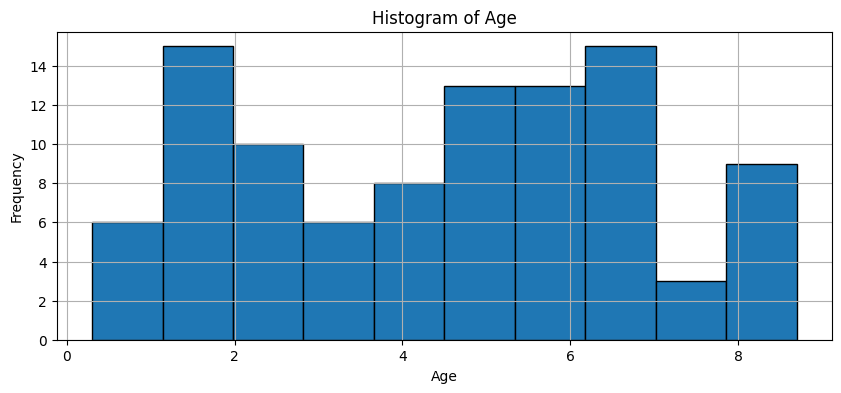

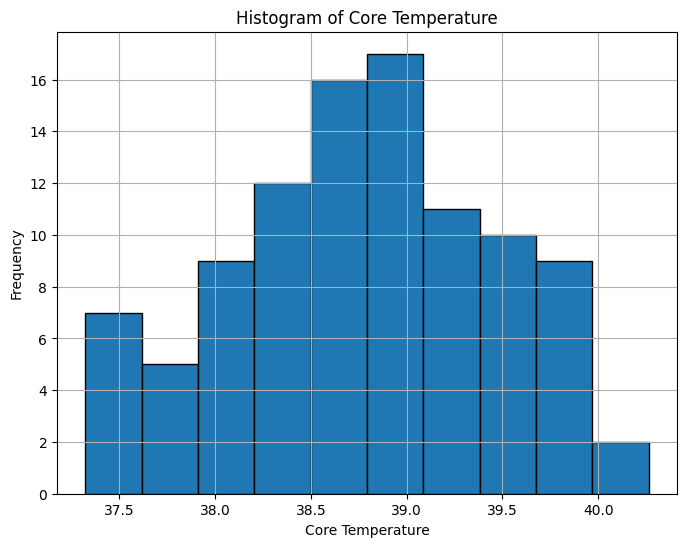

In [4]:
# Plotting histogram for 'age' feature
plt.figure(figsize=(10,4))
plt.hist(dataset['age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.grid(True)
plt.show()

# Plotting histogram for 'core_temperature' label
plt.figure(figsize=(8, 6))
plt.hist(dataset['core_temperature'], bins=10, edgecolor='black')
plt.xlabel('Core Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Core Temperature')
plt.grid(True)
plt.show()

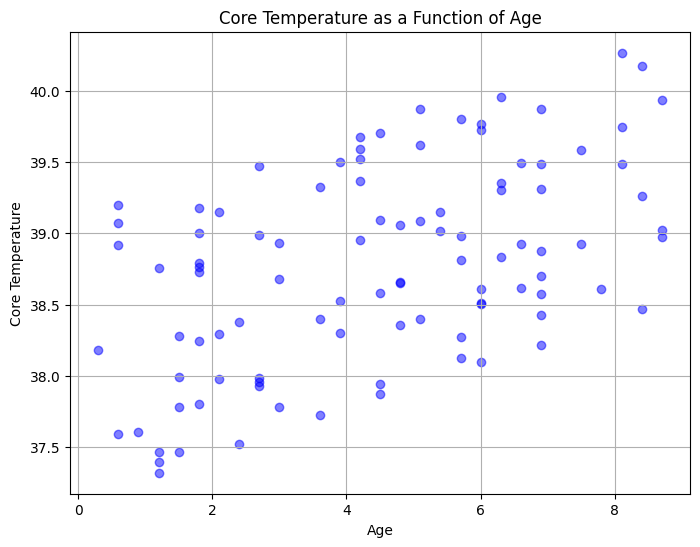

In [10]:
# Create a scatter plot of 'core_temperature' vs 'age'
plt.figure(figsize=(8, 6))
plt.scatter(dataset['age'], dataset['core_temperature'], marker='o', color='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Core Temperature')
plt.title('Core Temperature as a Function of Age')
plt.grid(True)
plt.show()

C:\Users\Luis Villamar\AppData\Local\Temp\ipykernel_21444\128826088.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trendline = lambda x: model.params[1] * x + model.params[0]


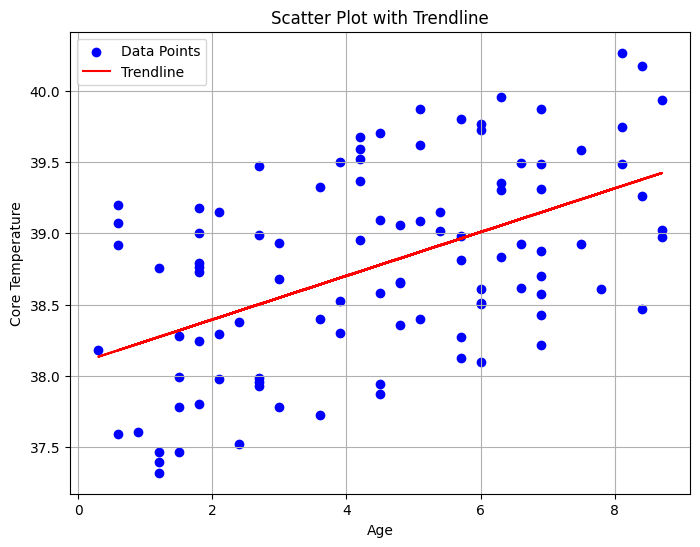

In [16]:
# First, we define our formula using a special syntax
# This says that core temperature is explained by age
formula = "core_temperature ~ age"

# Perform linear regression. This method takes care of the entire fitting procedure
model = smf.ols(formula = formula, data = dataset).fit()

#Graphing

plt.figure(figsize=(8, 6))
plt.scatter(dataset['age'], dataset['core_temperature'], label='Data Points', color='blue')

# Trendline using linear regression parameters
# Temporal function lambda x, y= mx + b
trendline = lambda x: model.params[1] * x + model.params[0]
plt.plot(dataset['age'], trendline(dataset['age']), label='Trendline', color='red')

plt.xlabel('Age')
plt.ylabel('Core Temperature')
plt.title('Scatter Plot with Trendline')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
print("Intercept:", model.params[0], "Slope:", model.params[1])

Intercept: 38.087867548892085 Slope: 0.15333957754731864


C:\Users\Luis Villamar\AppData\Local\Temp\ipykernel_21444\2475838416.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Intercept:", model.params[0], "Slope:", model.params[1])


In [19]:
# Test the model

def estimate_temperature(age):
    # Model param[0] is the intercepts and param[1] is the slope
    return age * model.params[1] + model.params[0]

print("Estimate temperature from age")
print(estimate_temperature(age=10))

Estimate temperature from age
39.62126332436527


C:\Users\Luis Villamar\AppData\Local\Temp\ipykernel_21444\313218799.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return age * model.params[1] + model.params[0]


Multiple Linear Rgression Model
Train Multiple and simple linear regression and compare ther perdormance using R-squared

In [20]:
import pandas

#Import the data from the .csv file
dataset = pandas.read_csv('doggy-illness.csv', delimiter="\t")

#Let's have a look at the data
dataset

,male,attended_training,age,body_fat_percentage,core_temperature,ate_at_tonys_steakhouse,needed_intensive_care,protein_content_of_last_meal
0,0,1,6.9,38,38.423169,0,0,7.66
1,0,1,5.4,32,39.015998,0,0,13.36
2,1,1,5.4,12,39.148341,0,0,12.90
3,1,0,4.8,23,39.060049,0,0,13.45
4,1,0,4.8,15,38.655439,0,0,10.53
...,...,...,...,...,...,...,...,...
93,0,0,4.5,38,37.939942,0,0,7.35
94,1,0,1.8,11,38.790426,1,1,12.18
95,0,0,6.6,20,39.489962,0,0,15.84
96,0,0,6.9,32,38.575742,1,1,9.79


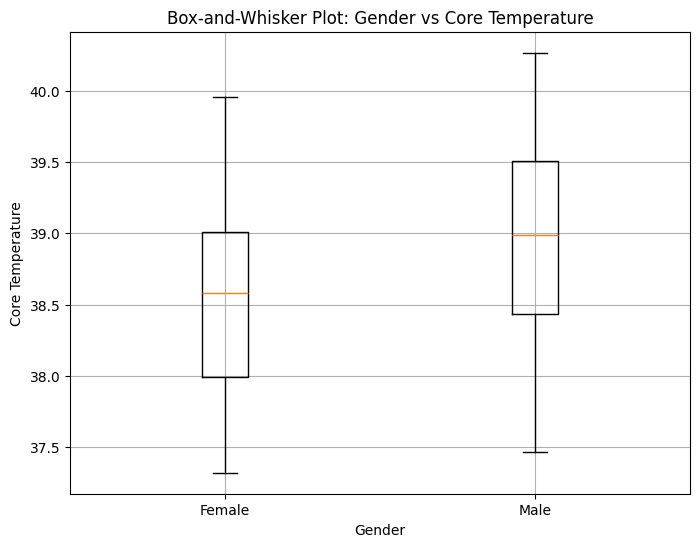

In [21]:
# Box-and-Whisker Plot for "male" vs "core_temperature"
plt.figure(figsize=(8, 6))
plt.boxplot([dataset[dataset['male'] == 0]['core_temperature'],
             dataset[dataset['male'] == 1]['core_temperature']],
            labels=['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Core Temperature')
plt.title('Box-and-Whisker Plot: Gender vs Core Temperature')
plt.grid(True)
plt.show()

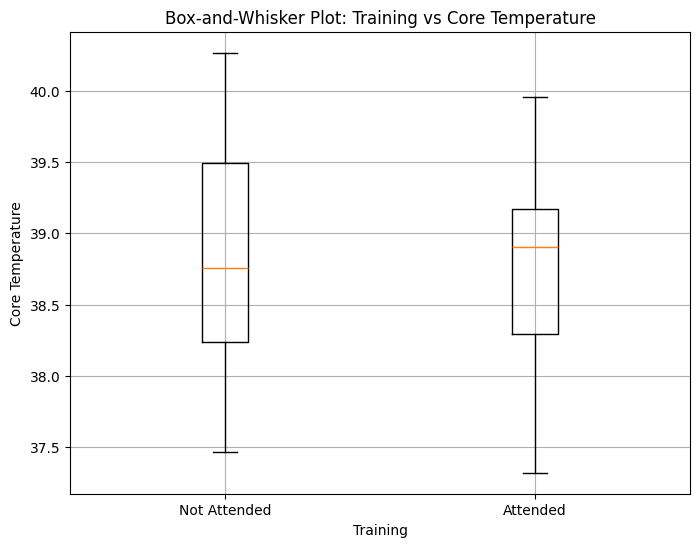

In [23]:
# Box-and-Whisker Plot for "attended_training" vs "core_temperature"
plt.figure(figsize=(8, 6))
plt.boxplot([dataset[dataset['attended_training'] == 0]['core_temperature'],
             dataset[dataset['attended_training'] == 1]['core_temperature']],
            labels=['Not Attended', 'Attended'])
plt.xlabel('Training')
plt.ylabel('Core Temperature')
plt.title('Box-and-Whisker Plot: Training vs Core Temperature')
plt.grid(True)
plt.show()

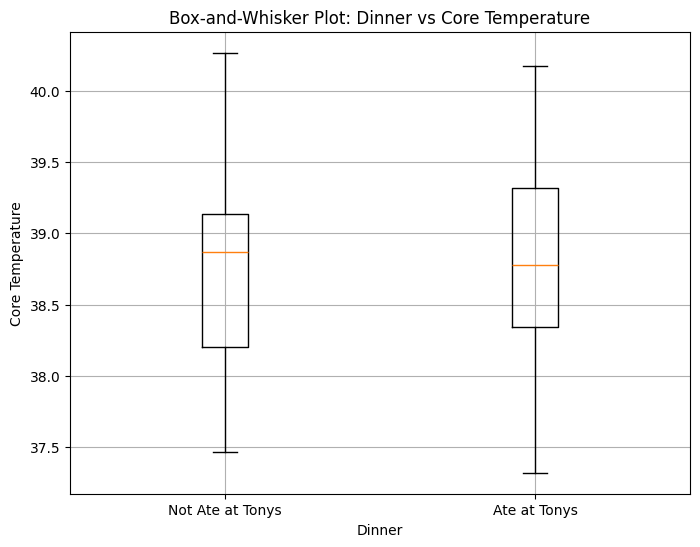

In [24]:
# Box-and-Whisker Plot for "ate_at_tonys_steakhouse" vs "core_temperature"
plt.figure(figsize=(8, 6))
plt.boxplot([dataset[dataset['ate_at_tonys_steakhouse'] == 0]['core_temperature'],
             dataset[dataset['ate_at_tonys_steakhouse'] == 1]['core_temperature']],
            labels=['Not Ate at Tonys', 'Ate at Tonys'])
plt.xlabel('Dinner')
plt.ylabel('Core Temperature')
plt.title('Box-and-Whisker Plot: Dinner vs Core Temperature')
plt.grid(True)
plt.show()

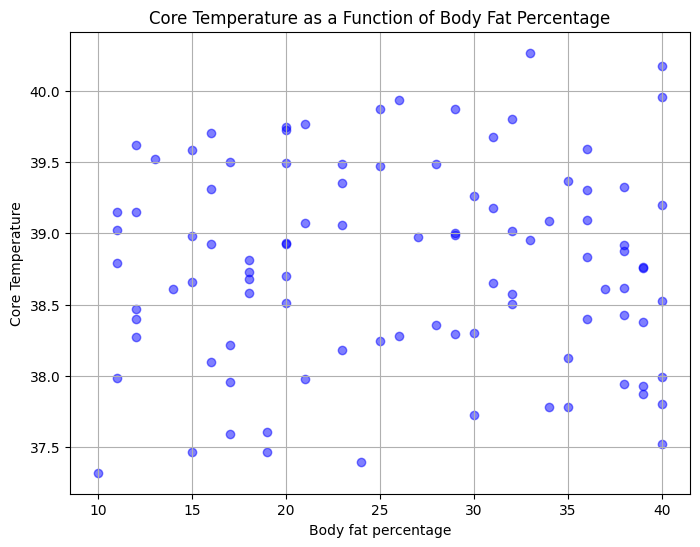

In [25]:
# Scatter Plot for "body_fat_percentage" vs "core_temperature"

plt.figure(figsize=(8, 6))
plt.scatter(dataset['body_fat_percentage'], dataset['core_temperature'], marker='o', color='blue', alpha=0.5)
plt.xlabel('Body fat percentage')
plt.ylabel('Core Temperature')
plt.title('Core Temperature as a Function of Body Fat Percentage')
plt.grid(True)
plt.show()



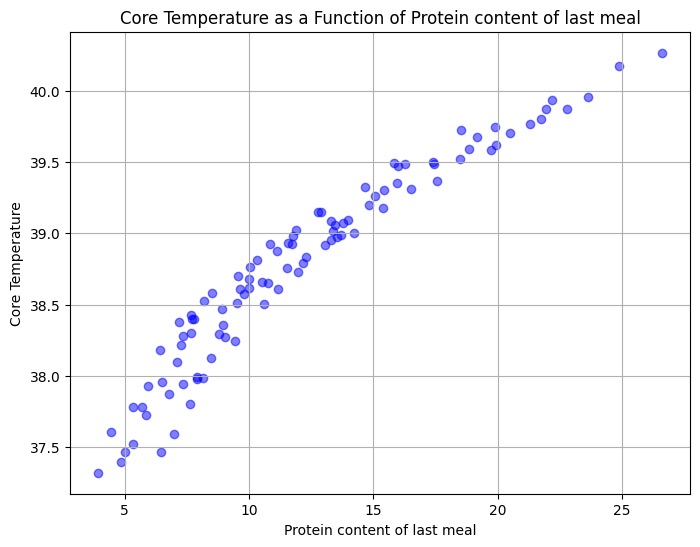

In [26]:
# Scatter Plot for "protein_content_of_last_meal" vs "core_temperature"

plt.figure(figsize=(8, 6))
plt.scatter(dataset['protein_content_of_last_meal'], dataset['core_temperature'], marker='o', color='blue', alpha=0.5)
plt.xlabel('Protein content of last meal')
plt.ylabel('Core Temperature')
plt.title('Core Temperature as a Function of Protein content of last meal')
plt.grid(True)
plt.show()

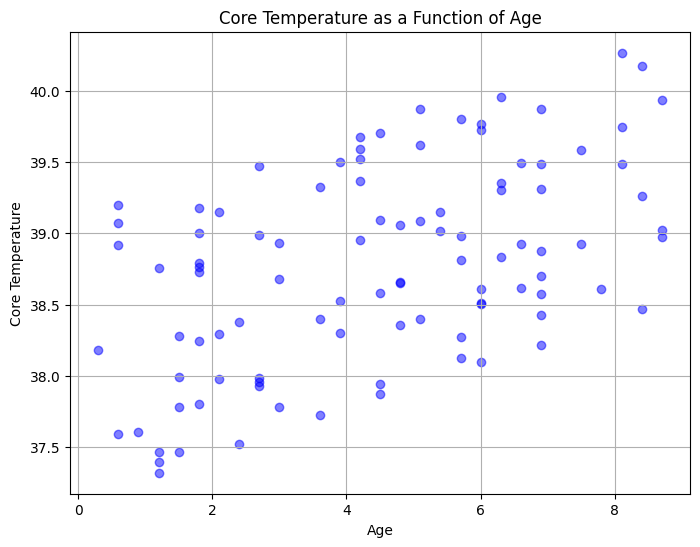

In [27]:
# Create a scatter plot of 'core_temperature' vs 'age'
plt.figure(figsize=(8, 6))
plt.scatter(dataset['age'], dataset['core_temperature'], marker='o', color='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Core Temperature')
plt.title('Core Temperature as a Function of Age')
plt.grid(True)
plt.show()

Let's try to predict core_temperature using simple linear regression, and note the R-Squared for these relationships.

male
R-squared: 0.0999007443071992


C:\Users\Luis Villamar\AppData\Local\Temp\ipykernel_21444\2254747753.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_values = simple_model.params[1] * x_values + simple_model.params[0]


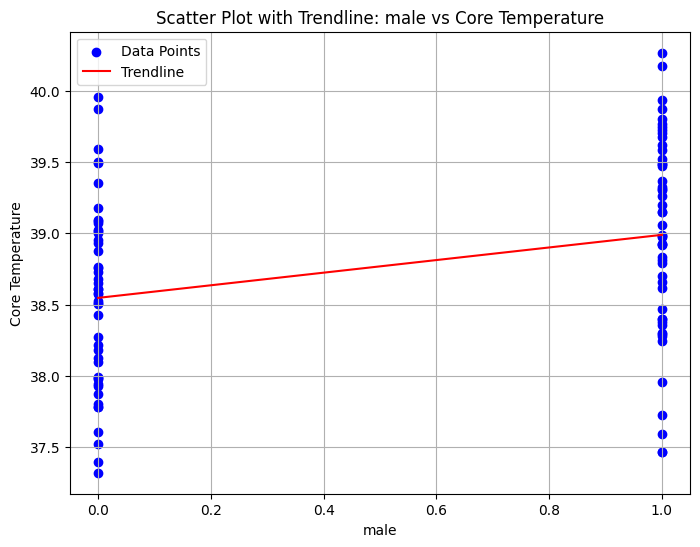

age
R-squared: 0.2648116081342463


C:\Users\Luis Villamar\AppData\Local\Temp\ipykernel_21444\2254747753.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_values = simple_model.params[1] * x_values + simple_model.params[0]


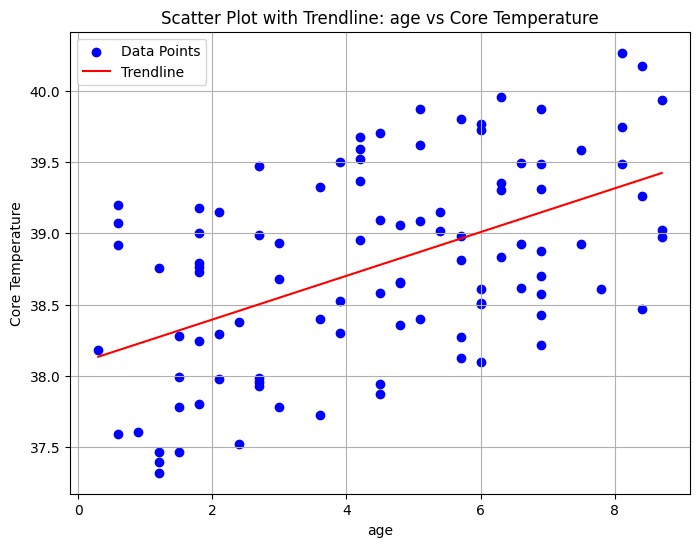

C:\Users\Luis Villamar\AppData\Local\Temp\ipykernel_21444\2254747753.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_values = simple_model.params[1] * x_values + simple_model.params[0]


protein_content_of_last_meal
R-squared: 0.9155158150005704


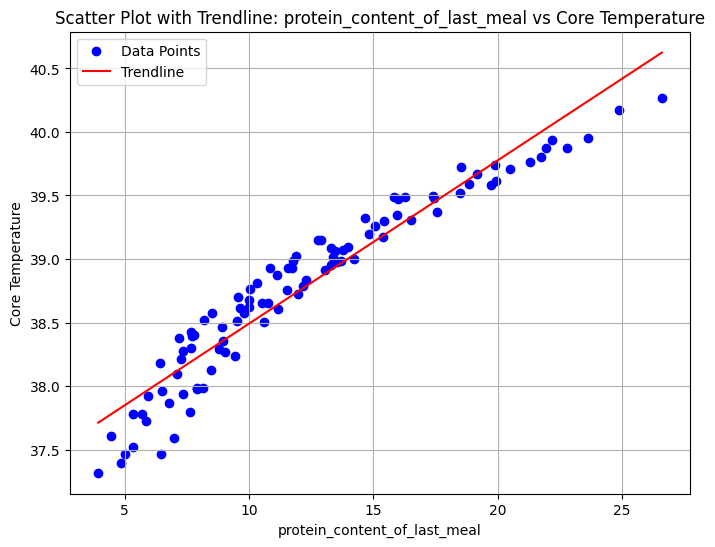

body_fat_percentage
R-squared: 0.00020809002637767193


C:\Users\Luis Villamar\AppData\Local\Temp\ipykernel_21444\2254747753.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_values = simple_model.params[1] * x_values + simple_model.params[0]


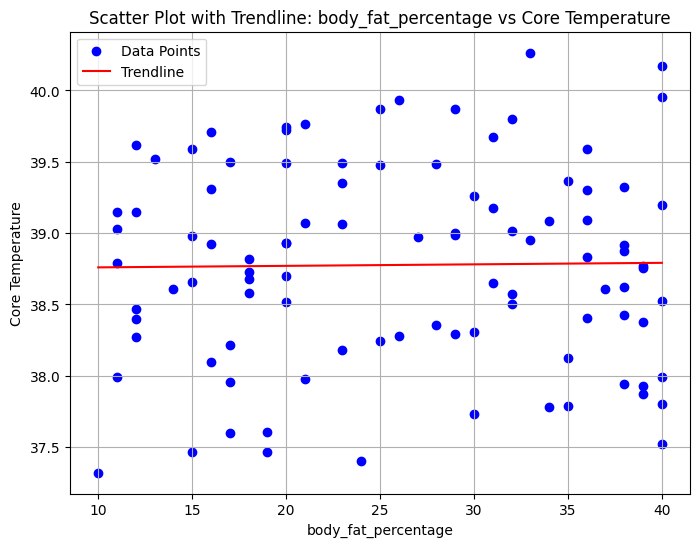

In [30]:

for feature in ["male", "age", "protein_content_of_last_meal", "body_fat_percentage"]:
    # Perform linear regression. This method takes care of
    # the entire fitting procedure for us.
    formula = "core_temperature ~ " + feature
    simple_model = smf.ols(formula = formula, data = dataset).fit()

    print(feature)
    print("R-squared:", simple_model.rsquared)

    # Scatter plot with trendline
    plt.figure(figsize=(8, 6))
    plt.scatter(dataset[feature], dataset['core_temperature'], label='Data Points', color='blue')
    x_values = np.linspace(min(dataset[feature]), max(dataset[feature]), 100)
    y_values = simple_model.params[1] * x_values + simple_model.params[0]
    plt.plot(x_values, y_values, label='Trendline', color='red')

    plt.xlabel(feature)
    plt.ylabel('Core Temperature')
    plt.title(f'Scatter Plot with Trendline: {feature} vs Core Temperature')
    plt.legend()
    plt.grid(True)
    plt.show()

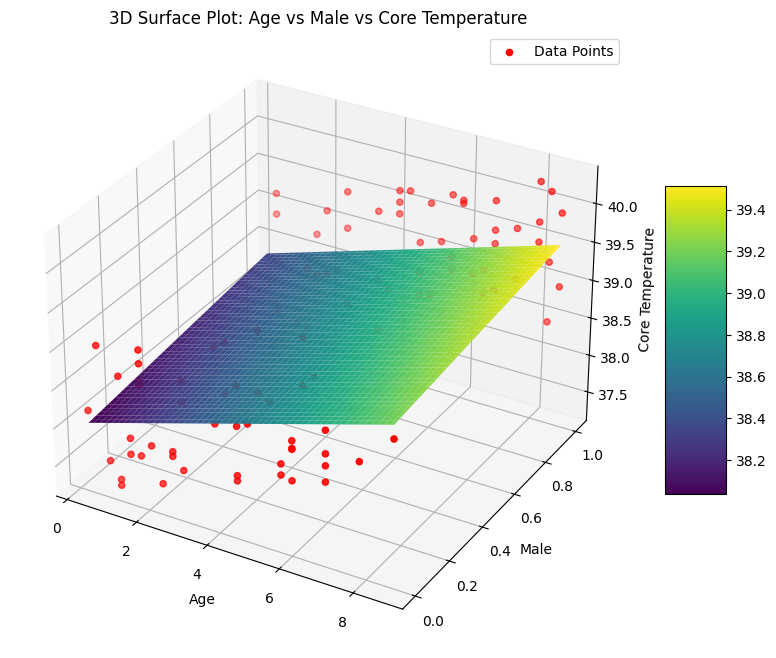

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       core_temperature   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     21.83
Date:                Tue, 07 May 2024   Prob (F-statistic):           1.58e-08
Time:                        11:43:02   Log-Likelihood:                -85.295
No. Observations:                  98   AIC:                             176.6
Df Residuals:                      95   BIC:                             184.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.9793      0.135    282.094      0.000      37.712      38.247
age            0.1406      0.026      5.459      0.000       0.089       0.192
male           0.3182      0.121      2.634      0.010       0.078       0.558
==============================================================================
Omnibus:                       21.610   Durbin-Watson:                   2.369
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.227
Skew:                           0.121   Prob(JB):                       0.0733
Kurtosis:                       1.895   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D


formula = "core_temperature ~ age + male"
model = smf.ols(formula=formula, data=dataset).fit()

def predict(age, male):
    '''
    This converts given age and male values into a prediction from the model
    '''
    # Return the predicted core temperature based on the model
    return model.params.Intercept + model.params.age * age + model.params.male * male

# Create meshgrid for 3D surface
age_range = np.linspace(min(dataset.age), max(dataset.age), 100)
male_range = np.linspace(0, 1, 100)
age_mesh, male_mesh = np.meshgrid(age_range, male_range)

# Calculate corresponding core temperature values using predict function
core_temp_mesh = predict(age_mesh, male_mesh)

# Create 3D surface plot using Matplotlib
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(age_mesh, male_mesh, core_temp_mesh, cmap='viridis')

# Add labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Male')
ax.set_zlabel('Core Temperature')
ax.set_title('3D Surface Plot: Age vs Male vs Core Temperature')

# Add data points as scatter plot
ax.scatter(dataset.age, dataset.male, dataset.core_temperature, color='red', label='Data Points')

# Add color bar for the surface plot
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.legend()
plt.show()
model.summary()

POLYNOMIAL REGRESSION

In [35]:
simple_model = smf.ols(formula = formula, data = dataset).fit()
print("R-squared:", simple_model.rsquared)

R-squared: 0.3148512699768006


Using core_temperature and protein_content_of_last_meal relationship

Simple Polynomial Regression

C:\Users\Luis Villamar\AppData\Local\Temp\ipykernel_21444\2137646501.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_values = polynomial_model.params[2] * x_values**2 + polynomial_model.params[1] * x_values + polynomial_model.params[0]


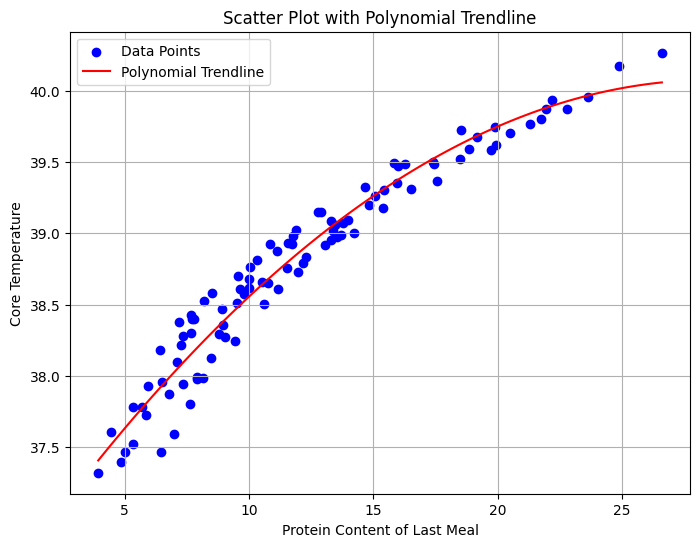

R-squared: 0.9514426069911688


In [37]:
polynomial_formula = "core_temperature ~ protein_content_of_last_meal + I(protein_content_of_last_meal**2)"
polynomial_model = smf.ols(formula=polynomial_formula, data=dataset).fit()

# Generate points for the polynomial trendline
x_values = np.linspace(min(dataset['protein_content_of_last_meal']), max(dataset['protein_content_of_last_meal']), 100)
y_values = polynomial_model.params[2] * x_values**2 + polynomial_model.params[1] * x_values + polynomial_model.params[0]

# Scatter plot with polynomial trendline using Matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(dataset['protein_content_of_last_meal'], dataset['core_temperature'], label='Data Points', color='blue')
plt.plot(x_values, y_values, label='Polynomial Trendline', color='red')
plt.xlabel('Protein Content of Last Meal')
plt.ylabel('Core Temperature')
plt.title('Scatter Plot with Polynomial Trendline')
plt.legend()
plt.grid(True)
plt.show()
print("R-squared:", polynomial_model.rsquared)

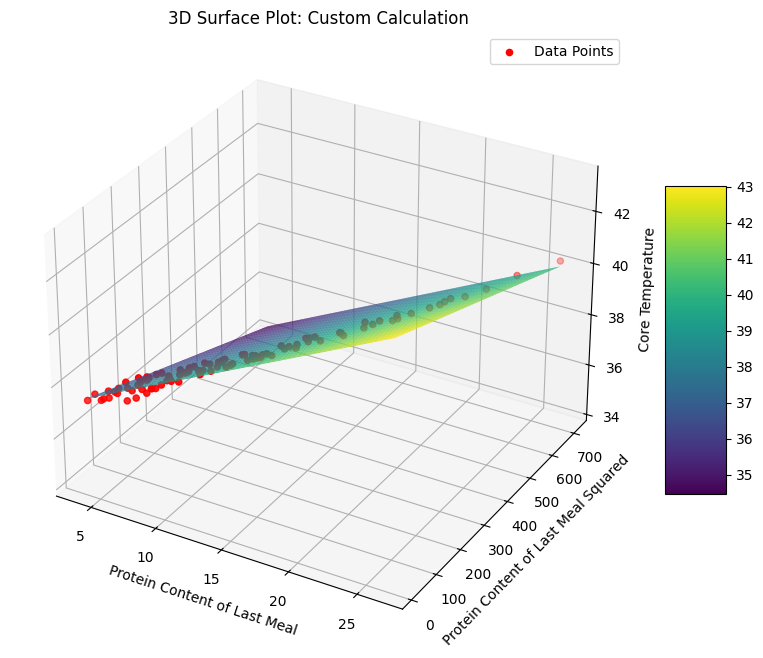

In [40]:
# Example polynomial model (replace with your actual model)

polynomial_model = smf.ols(formula=polynomial_formula, data=dataset).fit()

# Define custom calculation function
def custom_calculation(x, y):
    return polynomial_model.params.Intercept + (polynomial_model.params.protein_content_of_last_meal * x) + (polynomial_model.params['I(protein_content_of_last_meal ** 2)'] * y)

# Create meshgrid for 3D surface
x_range = np.linspace(min(dataset["protein_content_of_last_meal"]), max(dataset["protein_content_of_last_meal"]), 100)
y_range = np.linspace(min(dataset["protein_content_of_last_meal"])**2, max(dataset["protein_content_of_last_meal"])**2, 100)
x_mesh, y_mesh = np.meshgrid(x_range, y_range)
z_mesh = custom_calculation(x_mesh, y_mesh)

# Create 3D surface plot using Matplotlib
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap='viridis')

# Add labels and title
ax.set_xlabel('Protein Content of Last Meal')
ax.set_ylabel('Protein Content of Last Meal Squared')
ax.set_zlabel('Core Temperature')
ax.set_title('3D Surface Plot: Custom Calculation')

# Add data points as scatter plot
ax.scatter(dataset["protein_content_of_last_meal"], dataset["protein_content_of_last_meal"]**2, dataset["core_temperature"], color='red', label='Data Points')

# Add color bar for the surface plot
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.legend()
plt.show()